**Quinto Trabalho da Disciplina RNA e Deep Learning**

Discente: Valéria Cristina A. R. de Figueredo

# Regressão Linear com PyTorch

## Objetivos

Este exemplo utiliza regressão linear para estimar o comprimento das sépalas da íris a partir do seu comprimento das pétalas.
Utiliza-se:
- a função de perda MSE do PyTorch,
- treinamento dos parâmetros via gradiente descendente usando o otimizador.
- A rede é criada com uma camada nn.Linear()

## Importação dos pacotes

In [18]:
%matplotlib inline
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

torch.manual_seed(1234)

## Leitura dos dados

In [19]:
iris = load_iris()
data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

x_train = data[:,0:1].astype(np.float32)
y_train = data[:,1:2].astype(np.float32)

n_samples = x_train.shape[0]
print('x_train.shape:',x_train.shape, x_train.dtype)
print('y_train.shape:',y_train.shape, y_train.dtype)

print('x_train[:5]:\n', x_train[:5])
print('y_train[:5]:\n', y_train[:5])

x_train.shape: (50, 1) float32
y_train.shape: (50, 1) float32
x_train[:5]:
 [[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]]
y_train[:5]:
 [[4.7]
 [4.5]
 [4.9]
 [4. ]
 [4.6]]


### Normalização dos dados

In [20]:
x_train -= x_train.min()
x_train /= x_train.max()
y_train -= y_train.min()
y_train /= y_train.max()


In [21]:
x_train_bias = np.hstack([np.ones(shape=(n_samples,1)), x_train])

In [22]:
x_train_bias = torch.FloatTensor(x_train_bias)
y_train      = torch.FloatTensor(y_train)

## Criação do modelo da rede

In [23]:
model = torch.nn.Linear(2, 1, bias=False)

### Verificando a inicialização dos parâmetros

In [24]:
model.weight.data = torch.zeros(1,2)
torch.nn.init.uniform(model.weight.data, -0.1, 0.1)
model.weight.data

<ipython-input-24-e458ff4bc28e>:2: FutureWarning: `nn.init.uniform` is now deprecated in favor of `nn.init.uniform_`.
  torch.nn.init.uniform(model.weight.data, -0.1, 0.1)


tensor([[-0.0480, -0.0267]])

### Testando o predict da rede

In [25]:
model(Variable(torch.ones((5,2))))

tensor([[-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747],
        [-0.0747]], grad_fn=<MmBackward0>)

## Treinamento

### Definindo função de perda e otimizador

In [26]:
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.3)

### Laço de treinamento

In [27]:
num_epochs = 120
w0_list = []
w1_list = []
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # forward - predict
    out = model(inputs)

    w0_list.append(model.weight.data[0][0].item())
    w1_list.append(model.weight.data[0][1].item())

    #loss cálculo da função de perda
    loss = criterion(out, target)

    # backward e otimizador
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # verbose
    if (epoch+1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data))

Epoch[20/120], loss: 0.024990
Epoch[40/120], loss: 0.022381
Epoch[60/120], loss: 0.021554
Epoch[80/120], loss: 0.021291
Epoch[100/120], loss: 0.021208
Epoch[120/120], loss: 0.021182


## Avaliação

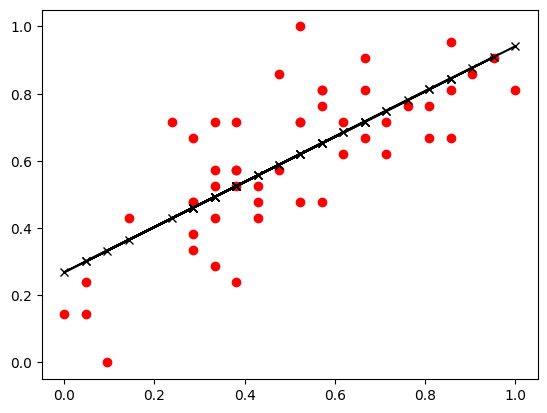

In [28]:
y_pred = model(Variable(x_train_bias))
plt.plot(x_train, y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train, y_pred.data.numpy(), 'kx-', label='Fitting Line')
plt.show()

# Exercícios

- 1) Calcule o valor da função de custo (MSE) depois da rede treinada, utilizando a
   função `criterion` utilizada no laço de treinamento.

In [29]:
#todo

# Definição das variáveis de entrada e saída
inputs = Variable(x_train_bias)  # Adapte conforme necessário
target = Variable(y_train)      # Adapte conforme necessário

# Previsão do modelo usando os dados de treinamento
y_pred = model(inputs)

# Calculo do MSE utilizando o critério (criterion)
mse_value = criterion(y_pred, target)

# Valor final da função de custo
print('MSE final: {:.6f}'.format(mse_value.item()))

MSE final: 0.021181


<details>
<summary>Mostrar Resultado</summary>

```python
y_pred = model(Variable(x_train_bias))
loss = criterion(y_pred, Variable(y_train))
print(loss)
```

</details>

- 2) Faça igual o exercício do notebook anterior, de plotar um gráfico scatterplot para
   mostrar a evolução dos parâmetros durante o treinamento pelo gradiente descendente.

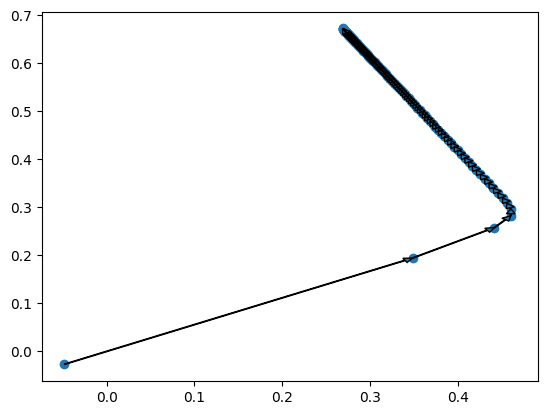

In [33]:
# To DO
# Primeira forma
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
      plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
              head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1

Esse gráfico mostra os valores dos pesos ao longo das épocas com setas indicando como os pesos evoluíram de uma época para outra.

Se w0_old (o valor anterior de w0) já foi atribuído, a função plt.arrow() desenha uma seta do ponto (w0_old, w1_old) para o ponto (w0, w1) (a evolução dos pesos de uma época para a seguinte).

Isso ajuda a visualizar a trajetória dos parâmetros durante o treinamento, destacando a direção da mudança.

Epoch[20/120], loss: 0.021173
Epoch[40/120], loss: 0.021171
Epoch[60/120], loss: 0.021170
Epoch[80/120], loss: 0.021170
Epoch[100/120], loss: 0.021169
Epoch[120/120], loss: 0.021169


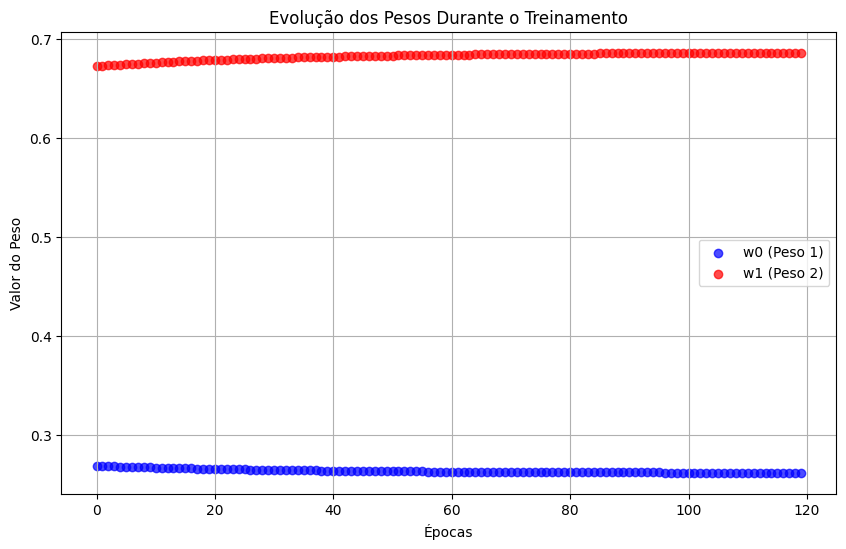

In [35]:
# todo
# Segunda forma

# Inicializar listas para armazenar os pesos
w0_list = []
w1_list = []

# Laço de treinamento
for epoch in range(num_epochs):
    inputs = Variable(x_train_bias)
    target = Variable(y_train)

    # Forward - prever
    y_pred = model(inputs)

    # Armazenar os pesos (w0 e w1)
    w0_list.append(model.weight.data[0][0].item())  # Peso w0
    w1_list.append(model.weight.data[0][1].item())  # Peso w1

    # Cálculo da perda (MSE)
    loss = criterion(y_pred, target)

    # Backward e atualização dos pesos
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Exibir o progresso
    if (epoch + 1) % 20 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'.format(epoch + 1, num_epochs, loss.item()))

# Plotar a evolução dos parâmetros durante o treinamento
plt.figure(figsize=(10, 6))

# Scatter plot dos parâmetros w0 e w1
plt.scatter(range(num_epochs), w0_list, label='w0 (Peso 1)', color='blue', alpha=0.7)
plt.scatter(range(num_epochs), w1_list, label='w1 (Peso 2)', color='red', alpha=0.7)

# Títulos e rótulos
plt.title('Evolução dos Pesos Durante o Treinamento')
plt.xlabel('Épocas')
plt.ylabel('Valor do Peso')
plt.legend()
plt.grid(True)

# Mostrar o gráfico
plt.show()

Este gráfico exibe a evolução dos pesos w0 e w1 ao longo das épocas de treinamento, de forma separada, mas sem a visualização da trajetória via setas.

Portanto, não indica a direção ou a magnitude da mudança entre épocas de forma tão evidente, ou bem focada.

O código deste gráfico repetiu trechos do código da parte do treinamento apenas como forma de visualização mais completa do código, o que é bom para os estudos.

<details>
<summary>Mostrar Resultado</summary>

```python
plt.scatter(w0_list,w1_list)
w0_old = None
for (w0,w1) in zip(w0_list,w1_list):
    if w0_old:
        plt.arrow(w0_old, w1_old, w0-w0_old, w1-w1_old,
                  head_length=0.01,head_width=0.01,shape='full',
                  length_includes_head=True)
    w0_old,w1_old = w0,w1
```

</details>

# Aprendizados

No presente trabalho, foram importados pacotes - bibliotecas, lidos e normalizados os dados, criado modelo de rede, com a verificação dos parâmetros e o teste do predict da rede.

Também ocorreu o treinamento, com a definição da função de perda, otimizador e o laço de treinamento, assim como a avaliação.

Na parte dos exercícios, ocorreu o cálculo do valor da função de custo (MSE), depois da rede treinada, utilizando a função criterion, bem como foi plotado dois gráficos scatterplot para demonstrar a evolução dos parâmetros durante o treinamento pelo gradiente descendente e explicada a diferença entre eles.
